### Data Preparation

The data used in this model is ebay bid data uploaded in the repository and contains 7 sel-explanatory predictor variables: 
Category (18 categories), Currency (USD, GBP, Euro), sellerRating, Duration (1, 3, 5, 7, or 10 days), EndDay (Monday–Sunday), ClosePrice and OpenPrice.

All required libraries have been installed in an Anacoda environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [2]:
xlsx = pd.ExcelFile('eBayAuctions.xlsx')
df = pd.read_excel(xlsx, 'eBay auctions')

In [8]:
df.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [6]:
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [5]:
df.isna().sum()

Category        0
Currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [9]:
# convert Duration type from int to object for creating dummy variables 
df = df.astype({'Duration': 'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   object 
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 123.4+ KB


In [10]:
df = pd.get_dummies(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sellerRating                   1972 non-null   int64  
 1   ClosePrice                     1972 non-null   float64
 2   OpenPrice                      1972 non-null   float64
 3   Competitive?                   1972 non-null   int64  
 4   Category_Antique/Art/Craft     1972 non-null   uint8  
 5   Category_Automotive            1972 non-null   uint8  
 6   Category_Books                 1972 non-null   uint8  
 7   Category_Business/Industrial   1972 non-null   uint8  
 8   Category_Clothing/Accessories  1972 non-null   uint8  
 9   Category_Coins/Stamps          1972 non-null   uint8  
 10  Category_Collectibles          1972 non-null   uint8  
 11  Category_Computer              1972 non-null   uint8  
 12  Category_Electronics           1972 non-null   u

### First Classification Tree

In [14]:
# create dataframe of all predictor variables

X = df.drop(columns = ['Competitive?'])

In [15]:
X.describe()

,sellerRating,ClosePrice,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,Duration_5,Duration_7,Duration_10,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,...,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,36.449087,12.926268,0.089757,0.090264,0.027383,0.009128,0.060345,0.018763,0.121197,...,0.236308,0.490365,0.153651,0.145538,0.277890,0.177992,0.171400,0.102434,0.086714,0.038032
std,5973.011033,89.493858,38.856149,0.285905,0.286632,0.163239,0.095127,0.238185,0.135720,0.326439,...,0.424921,0.500034,0.360705,0.352731,0.448073,0.382603,0.376953,0.303295,0.281487,0.191323
min,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,595.000000,4.907500,1.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1853.000000,9.995000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3380.000000,28.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37727.000000,999.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# target variable y created

y = df['Competitive?']

In [17]:
# 60% - 40% train-test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1)

In [20]:
# instantiate and fit decision tree model with minimum number of samples at leaf node of 50

fullClassTree = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [21]:
# classification tree accuracy score

fullClassTree.score(X_test, y_test)

0.8162230671736375

In [22]:
# library for decision tree graphic visuaization

export_graphviz(fullClassTree, out_file='fullClassTree.dot',feature_names= X_train.columns)

In [23]:
# Write down the results in terms of rules
tree_rules = export_text(fullClassTree, feature_names=list(X_train.columns))
print(tree_rules)

|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- Duration_10 >  0.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   | 

#### Describe the interesting/unexpected and uninteresting (= rather obvious) information that these rules provide.
Interesting result: It is quite interesting to see in one branch that the auction is competitive when sellerRating <= 813. By common sense, we expect the higher the seller rating is, the more competitive the auction would be, but not quite in this case. 
Another interesting point is about Duration. Even though the Duration_10 is used in the rules, it classified the result to be competitive auctions anyways no matter the duration is longer than 10 or not. 


Obvious information: Not all predictors are used in the decision tree classification rules. For Currency and EndDay, it is rather common sense that these predictors are not very related with the competitiveness of an aution. For category, it is also pretty obvious that the tree didn't get to use it as part of the rules becuase it has too manny (18) categories and we require at least 50 records in the terminal node. 



#### Suppose you had to slightly reduce the number of predictors due to software limitations, or for clarity of presentation, which would be (a) good variable(s) to choose?
We would remove the variables Category, Currency and endDay. It is becuase these variables are not used in the decision tree rules and reducing them would improve the clarity and would not change the final results. This is not implemented in the next section but is a possible recommendation for a more nimble model.

In [24]:
# accuracy
y_predicted = fullClassTree.predict(X_test)
accuracy_score(y_test, y_predicted)

0.8162230671736375

In [30]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8162)

       Prediction
Actual   0   1
     0 305  48
     1  97 339


In [31]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [27]:
# copy the content to the visualizer: webgraphviz.com
export_graphviz(fullClassTree, out_file='fullClassTree.dot',
                feature_names = X_train.columns)

#### Is this model practical for predicting the outcome of a new auction?

No, because we won't be able to know the close price for a new auction ahead of it being 
concluded. 

### Second Classification Tree

only with predictors that can be used for predicting the outcome of a new auction

In [52]:
cols = ['Competitive?'] + ['ClosePrice']
X_reduced = df.drop(columns = cols)
X_reduced.head()

,sellerRating,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,...,Duration_5,Duration_7,Duration_10,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,0.01,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,3249,0.01,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3249,0.01,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,3249,0.01,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3249,0.01,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [53]:
df['Currency_EUR'].unique()

array([0, 1], dtype=uint8)

In [59]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sellerRating                   1972 non-null   int64  
 1   OpenPrice                      1972 non-null   float64
 2   Category_Antique/Art/Craft     1972 non-null   uint8  
 3   Category_Automotive            1972 non-null   uint8  
 4   Category_Books                 1972 non-null   uint8  
 5   Category_Business/Industrial   1972 non-null   uint8  
 6   Category_Clothing/Accessories  1972 non-null   uint8  
 7   Category_Coins/Stamps          1972 non-null   uint8  
 8   Category_Collectibles          1972 non-null   uint8  
 9   Category_Computer              1972 non-null   uint8  
 10  Category_Electronics           1972 non-null   uint8  
 11  Category_EverythingElse        1972 non-null   uint8  
 12  Category_Health/Beauty         1972 non-null   u

In [55]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_reduced, y, test_size=0.4, random_state = 1)

In [56]:
# scaled down classification tree with ClosePrice removed

smallClassTree = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)
smallClassTree.fit(X_train_, y_train_)

DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [57]:
# Write down the results in terms of rules
tree_rules = export_text(smallClassTree, feature_names=list(X_train_.columns))
print(tree_rules)

|--- OpenPrice <= 3.62
|   |--- OpenPrice <= 1.04
|   |   |--- sellerRating <= 3138.50
|   |   |   |--- class: 1
|   |   |--- sellerRating >  3138.50
|   |   |   |--- class: 1
|   |--- OpenPrice >  1.04
|   |   |--- sellerRating <= 2365.50
|   |   |   |--- Currency_EUR <= 0.50
|   |   |   |   |--- sellerRating <= 2058.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sellerRating >  2058.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Currency_EUR >  0.50
|   |   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |   |--- sellerRating <= 522.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sellerRating >  522.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- OpenPrice >  2.45
|   |   |   |   |   |--- class: 1
|   |   |--- sellerRating >  2365.50
|   |   |   |--- class: 0
|--- OpenPrice >  3.62
|   |--- sellerRating <= 601.50
|   |   |--- sellerRating <= 128.00
|   |   |   |--- class: 1
|   |   |--- sellerRating >  128.00
|   |   |   |--- class: 1


In [38]:
# create graphical visualization of decision tree
# copy the content to the visualizer: webgraphviz.com

export_graphviz(smallClassTree, out_file='smallClassTree.dot',
                feature_names = X_train_.columns)

In [58]:
%matplotlib inline

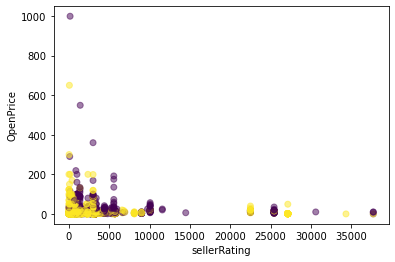

In [61]:
# Show variable interaction for sellerRating with OpenPrice


x1 = df['OpenPrice']
x2 = df['sellerRating']
colors = df['Competitive?']

plt.scatter(x2, x1, c=colors, alpha=0.5)
plt.ylabel('OpenPrice')
plt.xlabel('sellerRating')
plt.show()

#### Does this split seem reasonable with respect to the meaning of the two predictors? Does it seem to do a good job of separating the two classes?

This split doesn't seem to be reasonable because it shows on the scatter plot that most competitive auctions and incompetive auctions are mixed together in the lower left corner when both the OpeningPrice and sellerRating are lower. In other words, neither variable alone does a good job of separating the two classes (competitive and non-competitive auctions). 

By just looking at the meaning of the two predictors, it is intuitive that auctions with lower Opening Price would be more competitive. Similarly,  higher Seller Rating, one would think should have more competitive auctions. However, the split with seller rating shows more competitiveness at lower ratings. A possible explanation is the fact that unpopular sellers (with only a few historical sales) find it easier to achieve a very high rating due to the paucity of rating scores given, while much more popular sellers with lots of sales would find it difficult to have very high ratings after multiple sales interactions, yet these are the popular sellers with competitive auctions and a larger buyer base.

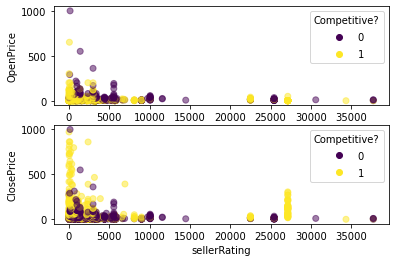

In [62]:
# Show variable interaction for sellerRating with OpenPrice and compare with ClosePrice(not used in final model)

fig, ax = plt.subplots(2)

x1 = df['OpenPrice']
x2 = df['sellerRating']
x3 = df['ClosePrice']
colors = df['Competitive?']

ax[0].scatter(x2, x1, c=colors, alpha=0.5)
ax[0].set(xlabel='sellerRating', ylabel='OpenPrice')
ax[0].legend(*scatter.legend_elements(),
                    loc="upper right", title="Competitive?")

ax[1].scatter(x2, x3, c=colors, alpha=0.5)
ax[1].set(xlabel='sellerRating', ylabel='ClosePrice')
ax[1].legend(*scatter.legend_elements(),
                    loc="upper right", title="Competitive?")

plt.show()

In [63]:
classificationSummary(y_test_, smallClassTree.predict(X_test_))

Confusion Matrix (Accuracy 0.7250)

       Prediction
Actual   0   1
     0 261  92
     1 125 311


#### Examine the classification table for the tree. What can you say about the predictive performance of this model?

The predictive performance is lower than the first tree but it is more practical in predicting the competitiveness of a new auction because it is impractical to build a forecast model that uses ClosePrice as a variable, given we have no way of knowing this variable's value ahead of the completion of the auction. 
The accuracy is 72.50% which still has some predictive power. 

In [64]:
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance. The higher, the more important the feature. 

importance = smallClassTree.feature_importances_
    
for name, importance in zip(X_train_.columns, importance):
    print('%s Score: %.5f' % (name, importance))

sellerRating Score: 0.35712
OpenPrice Score: 0.57551
Category_Antique/Art/Craft Score: 0.00000
Category_Automotive Score: 0.00000
Category_Books Score: 0.00000
Category_Business/Industrial Score: 0.00000
Category_Clothing/Accessories Score: 0.00000
Category_Coins/Stamps Score: 0.00000
Category_Collectibles Score: 0.00000
Category_Computer Score: 0.00000
Category_Electronics Score: 0.00000
Category_EverythingElse Score: 0.00000
Category_Health/Beauty Score: 0.00000
Category_Home/Garden Score: 0.00000
Category_Jewelry Score: 0.00000
Category_Music/Movie/Game Score: 0.02398
Category_Photography Score: 0.00000
Category_Pottery/Glass Score: 0.00000
Category_SportingGoods Score: 0.00000
Category_Toys/Hobbies Score: 0.02968
Currency_EUR Score: 0.01371
Currency_GBP Score: 0.00000
Currency_US Score: 0.00000
Duration_1 Score: 0.00000
Duration_3 Score: 0.00000
Duration_5 Score: 0.00000
Duration_7 Score: 0.00000
Duration_10 Score: 0.00000
endDay_Fri Score: 0.00000
endDay_Mon Score: 0.00000
endDay_

#### Based on this last tree, what can you conclude from these data about the chances of an auction obtaining at least two bids (our definition of competitiveness) and its relationship to the auction settings set by the seller (duration, opening price, ending day, currency)?

The opening price is the most important predictor among all as it has the highest feature importance score. 

The Duration and Ending Day seems to be very insigficant in predicting the chances of an auction obtaining at least two bids. 

For Currency, if the currency is in Euro, there seems to be a slightly higher chance of an auction being competitive. However, the Currencies GBP and US are not significant. 

#### What would you recommend for a seller as the strategy that will most likely lead to a competitive auction?

Lower the opening price, which gives a higher chance of the auction obtaining at least two bids. For every transaction, be friendly and responsible in order to keep a high seller rating within the band of seller ratings for popular sellers - the extremely high seller ratings observed seem impractical, are likely observed in cases of good but unpopular sellers and do not predict competitive auctions anyway.

Items which are in Category_Music/Movie/Game and Category_Toys/Hobbies are slightly better than other categories. One might want to be strategic about selecting the category for some items which can belong to multiple categories including those above. 

Setting the price in euro might also slightly improve the competitiveness but this will depend on seller's prefence and region where they live. (this conclusion is shaky but has some merit)